In [1]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('Sales and Payment Plans Data_Technical Exercise Commercial Sales Analyst.xlsx')
import matplotlib.pyplot as plt

In [2]:
df.head()

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,Brand,Masterbrand,Model,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status
0,2023-04-20,"MK 600 24"" TV v21 Staff",M-KOPA 600,Solar TV,KES,64199,2999.0,90.0,680.0,61200.0,M-KOPA,Solar,M-KOPA 600,Acquisition,MK TV,"24"" TV",4319,Active
1,2023-04-20,"MK 6000C 32"" TV v3 Staff",M-KOPA 6000,Solar TV,KES,86499,6499.0,100.0,800.0,80000.0,M-KOPA,Solar,M-KOPA 6000,Acquisition,MK TV,"32"" TV",4318,New
2,2023-02-08,"MK 600 24"" TV v24 Non-Locking HRA",M-KOPA 600,Solar TV,KES,81999,5999.0,100.0,760.0,76000.0,M-KOPA,Solar,M-KOPA 600,Acquisition,MK TV,"24"" TV",4077,Closed
3,2023-02-08,MK 6 v11 HRA,M-KOPA 6,Lights,KES,23999,999.0,50.0,460.0,23000.0,M-KOPA,Solar,M-KOPA 6,Acquisition,MK Classic,4 lights,4088,Active
4,2023-02-08,"MK 6000 32"" TV v24 Non Locking HRA",M-KOPA 6000,Solar TV,KES,116199,6999.0,130.0,840.0,109200.0,M-KOPA,Solar,M-KOPA 6000,Acquisition,MK TV,"32"" TV",4102,Closed


In [3]:
df1 = pd.read_excel('payment plan sales.xlsx')

In [4]:
df1.head()

,Model,Local Sold At Month,Payment Plan Name,Sales
0,M-KOPA Copia TV,2023-05,"MK Copia TV 32"" Upgrade v9",2
1,M-KOPA Copia TV,2023-05,"MK Copia TV 32"" Upgrade v10",18
2,M-KOPA Copia TV,2023-05,"MK Copia TV 32"" Upgrade v6",1
3,M-KOPA Copia TV,2023-04,"MK Copia TV 32"" Upgrade v2",1
4,M-KOPA Copia TV,2023-04,"MK Copia TV 32"" Upgrade v10",35


In [5]:
salesdf = pd.merge(df, df1, on='Payment Plan Name')

In [6]:
salesdf["Sales"].tail()

152    11
153     7
154    48
155    36
156     5
Name: Sales, dtype: int64

In [7]:
# Convert the date column to datetime type
salesdf['Local Sold At Month'] = pd.to_datetime(salesdf['Local Sold At Month'])

# Extract the month from the date
salesdf['Month'] = salesdf['Local Sold At Month'].dt.month

In [8]:
salesdf.head(2)

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,...,Model_x,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status,Model_y,Local Sold At Month,Sales,Month
0,2023-02-08,"MK 6000 32"" TV (BB) v2 HRA",M-KOPA 6000,Solar TV,KES,129299,7499.0,145.0,840.0,121800.0,...,M-KOPA 6000,Acquisition,MK TV,"32"" TV",4096,Active,M-KOPA 6000,2023-05-01,1,5
1,2023-02-08,"MK 6000 32"" TV (BB) v2 HRA",M-KOPA 6000,Solar TV,KES,129299,7499.0,145.0,840.0,121800.0,...,M-KOPA 6000,Acquisition,MK TV,"32"" TV",4096,Active,M-KOPA 6000,2023-03-01,2,3


In [9]:
monthly_sales = salesdf.groupby(['Month', 'Payment Plan Name'])['Sales'].sum()

monthly_sales



Month  Payment Plan Name                   
1      MK +600 24" TV v27                       16
       MK +6000 32" TV (BB) v2                   1
       MK +6000 32" TV v23                     257
       MK 6 v10                                 27
       MK 6 v4 Staff                             1
                                              ... 
12     MK 6000 (32"Backup TV) v9                 1
       MK 6000 32" TV (BB) v1                  411
       MK 6000 32" TV v2 Staff                   9
       MK 6000 32" TV v22                      718
       MK 60K (80W Panel) 32"TV & Fridge v4      1
Name: Sales, Length: 157, dtype: int64

In [10]:
# Reset index to turn the groupby result into a DataFrame
monthly_sales = monthly_sales.reset_index()

In [11]:
monthly_sales

,Month,Payment Plan Name,Sales
0,1,"MK +600 24"" TV v27",16
1,1,"MK +6000 32"" TV (BB) v2",1
2,1,"MK +6000 32"" TV v23",257
3,1,MK 6 v10,27
4,1,MK 6 v4 Staff,1
...,...,...,...
152,12,"MK 6000 (32""Backup TV) v9",1
153,12,"MK 6000 32"" TV (BB) v1",411
154,12,"MK 6000 32"" TV v2 Staff",9
155,12,"MK 6000 32"" TV v22",718


In [12]:

# Find the index of the maximum sales value for each month
max_sales_indices = monthly_sales.groupby('Month')['Sales'].idxmax()

# Extract the payment plan with the highest sales for each month
payment_plan_highest_sales = monthly_sales.loc[max_sales_indices, ['Month', 'Payment Plan Name', 'Sales']]

In [13]:
payment_plan_highest_sales

,Month,Payment Plan Name,Sales
10,1,"MK 6000 32"" TV v22",1163
20,2,"MK 6000 32"" TV v22",630
27,3,"MK 600 24"" TV v20",599
37,4,"MK 600 24"" TV v20",615
43,5,"MK 600 24"" TV v20",124
58,6,"MK 6000 32"" TV v20",1234
76,7,"MK 6000 32"" TV v21",1279
95,8,"MK 6000 32"" TV v21",2109
111,9,"MK 6000 32"" TV v22",1097
121,10,"MK 600 24"" TV v18",649


In [14]:
import calendar

# Assuming you have a DataFrame called 'payment_plan_highest_sales' with columns 'Month', 'Payment Plan', and 'Sales'

# Create a dictionary to map month numbers to month names
month_names = dict(enumerate(calendar.month_name))

# Replace the month numbers with month names
payment_plan_highest_sales['Month'] = payment_plan_highest_sales['Month'].map(month_names)

In [15]:
payment_plan_highest_sales

,Month,Payment Plan Name,Sales
10,January,"MK 6000 32"" TV v22",1163
20,February,"MK 6000 32"" TV v22",630
27,March,"MK 600 24"" TV v20",599
37,April,"MK 600 24"" TV v20",615
43,May,"MK 600 24"" TV v20",124
58,June,"MK 6000 32"" TV v20",1234
76,July,"MK 6000 32"" TV v21",1279
95,August,"MK 6000 32"" TV v21",2109
111,September,"MK 6000 32"" TV v22",1097
121,October,"MK 600 24"" TV v18",649


In [ ]:
# Set the 'Month' column as the index
payment_plan_highest_sales.set_index('Month', inplace=True)


In [38]:
payment_plan_highest_sales

,Payment Plan Name,Sales
Month,,
January,"MK 6000 32"" TV v22",1163
February,"MK 6000 32"" TV v22",630
March,"MK 600 24"" TV v20",599
April,"MK 600 24"" TV v20",615
May,"MK 600 24"" TV v20",124
June,"MK 6000 32"" TV v20",1234
July,"MK 6000 32"" TV v21",1279
August,"MK 6000 32"" TV v21",2109
September,"MK 6000 32"" TV v22",1097


In [46]:
# Save the DataFrame as a CSV file
payment_plan_highest_sales.to_csv('payment_plan_highest_sales.csv', index=True)

payment plan with highest sales per month 

In [16]:
salesdf.head(3)

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,...,Model_x,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status,Model_y,Local Sold At Month,Sales,Month
0,2023-02-08,"MK 6000 32"" TV (BB) v2 HRA",M-KOPA 6000,Solar TV,KES,129299,7499.0,145.0,840.0,121800.0,...,M-KOPA 6000,Acquisition,MK TV,"32"" TV",4096,Active,M-KOPA 6000,2023-05-01,1,5
1,2023-02-08,"MK 6000 32"" TV (BB) v2 HRA",M-KOPA 6000,Solar TV,KES,129299,7499.0,145.0,840.0,121800.0,...,M-KOPA 6000,Acquisition,MK TV,"32"" TV",4096,Active,M-KOPA 6000,2023-03-01,2,3
2,2023-02-08,"MK 600 24"" TV v21 HRA",M-KOPA 600,Solar TV,KES,74999,4999.0,100.0,700.0,70000.0,...,M-KOPA 600,Acquisition,MK TV,"24"" TV",4083,Active,M-KOPA 600,2023-05-01,43,5


In [17]:
salesdf['Revenue'] = salesdf['Product Price'] * salesdf['Sales']
salesdf.head()

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,...,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status,Model_y,Local Sold At Month,Sales,Month,Revenue
0,2023-02-08,"MK 6000 32"" TV (BB) v2 HRA",M-KOPA 6000,Solar TV,KES,129299,7499.0,145.0,840.0,121800.0,...,Acquisition,MK TV,"32"" TV",4096,Active,M-KOPA 6000,2023-05-01,1,5,129299
1,2023-02-08,"MK 6000 32"" TV (BB) v2 HRA",M-KOPA 6000,Solar TV,KES,129299,7499.0,145.0,840.0,121800.0,...,Acquisition,MK TV,"32"" TV",4096,Active,M-KOPA 6000,2023-03-01,2,3,258598
2,2023-02-08,"MK 600 24"" TV v21 HRA",M-KOPA 600,Solar TV,KES,74999,4999.0,100.0,700.0,70000.0,...,Acquisition,MK TV,"24"" TV",4083,Active,M-KOPA 600,2023-05-01,43,5,3224957
3,2023-02-08,"MK 600 24"" TV v21 HRA",M-KOPA 600,Solar TV,KES,74999,4999.0,100.0,700.0,70000.0,...,Acquisition,MK TV,"24"" TV",4083,Active,M-KOPA 600,2023-04-01,230,4,17249770
4,2023-02-08,"MK 600 24"" TV v21 HRA",M-KOPA 600,Solar TV,KES,74999,4999.0,100.0,700.0,70000.0,...,Acquisition,MK TV,"24"" TV",4083,Active,M-KOPA 600,2023-03-01,215,3,16124785


In [41]:
# Group the data by "Product Sub Category" and calculate the total revenue for each group
revenue_by_subcategory = salesdf.groupby('Product Sub Category')['Revenue'].sum()
revenue_by_subcategory=revenue_by_subcategory.sort_values(ascending=False)
revenue_by_subcategory.to_csv('revenue_by_subcategory.csv', index=False)

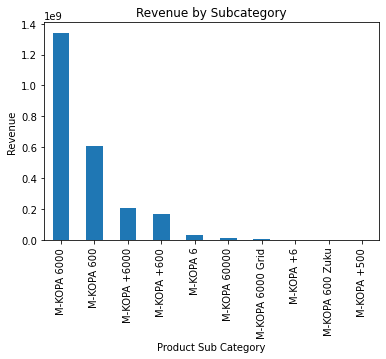

In [19]:
# Sort the revenue values in descending order
revenue_by_subcategory = revenue_by_subcategory.sort_values(ascending=False)
# Plot the revenue by subcategory using a bar chart
revenue_by_subcategory.plot(kind='bar')

# Add labels and title
plt.xlabel('Product Sub Category')
plt.ylabel('Revenue')
plt.title('Revenue by Subcategory')

# Show the plot
plt.show()

In [20]:

# Drop the rows with the specified index
salesdf = salesdf.drop(index=126)
salesdf = salesdf.drop(index=127)


In [21]:
salesdf.head(2)

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,...,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status,Model_y,Local Sold At Month,Sales,Month,Revenue
0,2023-02-08,"MK 6000 32"" TV (BB) v2 HRA",M-KOPA 6000,Solar TV,KES,129299,7499.0,145.0,840.0,121800.0,...,Acquisition,MK TV,"32"" TV",4096,Active,M-KOPA 6000,2023-05-01,1,5,129299
1,2023-02-08,"MK 6000 32"" TV (BB) v2 HRA",M-KOPA 6000,Solar TV,KES,129299,7499.0,145.0,840.0,121800.0,...,Acquisition,MK TV,"32"" TV",4096,Active,M-KOPA 6000,2023-03-01,2,3,258598


In [45]:
salesdf.to_csv('salesdf.csv', index=False)

In [44]:
# Calculate the average top-up amount for each product type
average_top_up = salesdf.groupby('Product Type')['Daily Top Up'].mean()

average_top_up.to_csv('average_top_up.csv', index=False)

In [23]:
salesdf["Model_x"].unique()

array(['M-KOPA 6000', 'M-KOPA 600', 'M-KOPA +6000', 'M-KOPA +600',
       'M-KOPA 6', 'M-KOPA 60000', 'M-KOPA 6000 Grid', 'M-KOPA 600 Zuku'],
      dtype=object)

In [24]:
salesdf["Model_y"].unique()

array(['M-KOPA 6000', 'M-KOPA 600', 'M-KOPA +6000', 'M-KOPA +600',
       'M-KOPA 6', 'M-KOPA 60000', 'M-KOPA 6000 Grid', 'M-KOPA 600 Zuku'],
      dtype=object)

In [25]:
# Check if the two columns are equal
columns_equal = salesdf['Model_x'].equals(salesdf['Model_y'])

# Print the result
if columns_equal:
    print("Are equal.")
else:
    print("Are not equal.")

Are equal.


In [26]:
salesdf.head(2)

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,...,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status,Model_y,Local Sold At Month,Sales,Month,Revenue
0,2023-02-08,"MK 6000 32"" TV (BB) v2 HRA",M-KOPA 6000,Solar TV,KES,129299,7499.0,145.0,840.0,121800.0,...,Acquisition,MK TV,"32"" TV",4096,Active,M-KOPA 6000,2023-05-01,1,5,129299
1,2023-02-08,"MK 6000 32"" TV (BB) v2 HRA",M-KOPA 6000,Solar TV,KES,129299,7499.0,145.0,840.0,121800.0,...,Acquisition,MK TV,"32"" TV",4096,Active,M-KOPA 6000,2023-03-01,2,3,258598


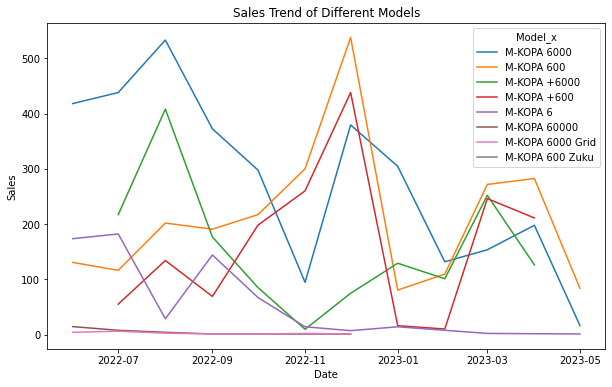

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'Model' and 'Sales' 

# Convert the date column to datetime type, if needed
salesdf['Local Sold At Month'] = pd.to_datetime(salesdf['Local Sold At Month'])
plt.figure(figsize=(10, 6))
# Plot the sales trend over time with different trend lines for each model
sns.lineplot(x='Local Sold At Month', y='Sales', hue='Model_x', data=salesdf, ci=None)

# Add a title and labels
plt.title('Sales Trend of Different Models')
plt.xlabel('Date')
plt.ylabel('Sales')

# Show the plot
plt.show()


In [28]:
# Sort the DataFrame by 'Sales' column in ascending order
sorted_df = salesdf.sort_values('Sales', ascending=True)

In [29]:
sorted_df.tail()

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,...,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status,Model_y,Local Sold At Month,Sales,Month,Revenue
57,2022-08-29,"MK 6000 32"" TV v22",M-KOPA 6000,Solar TV,KES,116199,6999.0,130.0,840.0,109200.0,...,Acquisition,MK TV,"32"" TV",3309,Active,M-KOPA 6000,2023-01-01,1163,1,135139437
98,2022-02-01,"MK 6000 32"" TV v20",M-KOPA 6000,Solar TV,KES,88999,7999.0,135.0,600.0,81000.0,...,Acquisition,MK TV,"32"" TV",2623,Closed,M-KOPA 6000,2022-06-01,1234,6,109824766
65,2022-07-01,"MK 6000 32"" TV v21",M-KOPA 6000,Solar TV,KES,108399,6999.0,130.0,780.0,101400.0,...,Acquisition,MK TV,"32"" TV",3128,Closed,M-KOPA 6000,2022-07-01,1279,7,138642321
18,2022-11-18,"MK 600 24"" TV v20",M-KOPA 600,Solar TV,KES,74999,4999.0,100.0,700.0,70000.0,...,Acquisition,MK TV,"24"" TV",3763,Active,M-KOPA 600,2022-12-01,1608,12,120598392
64,2022-07-01,"MK 6000 32"" TV v21",M-KOPA 6000,Solar TV,KES,108399,6999.0,130.0,780.0,101400.0,...,Acquisition,MK TV,"32"" TV",3128,Closed,M-KOPA 6000,2022-08-01,2109,8,228613491


In [30]:
# Get all the unique entries in the 'Column' column
unique_entries = salesdf['Masterbrand'].unique()

# Print the unique entries
print(unique_entries)

['Solar']


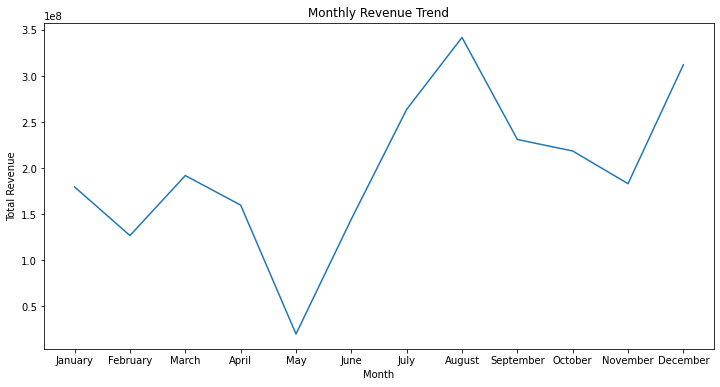

In [31]:
import calendar
# Group the data by the month and calculate the total revenue for each month
monthly_revenue = salesdf.groupby("Local Sold At Month")['Revenue'].sum()

# Reset the index to make 'Date' a column
monthly_revenue = monthly_revenue.reset_index()
# Replace the month numbers with month names
monthly_revenue['Local Sold At Month'] = monthly_revenue['Local Sold At Month'].dt.month.map(lambda x: calendar.month_name[x])
monthly_revenue['Local Sold At Month'] = pd.Categorical(monthly_revenue['Local Sold At Month'], categories=calendar.month_name[1:], ordered=True)
# Plot the trendline of the monthly total revenue
plt.figure(figsize=(12, 6))
sns.lineplot(x='Local Sold At Month', y='Revenue', data=monthly_revenue)

# Add a title and labels
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

# Show the plot
plt.show()